#  CLASSIFYING POTATO LEAVES 

#####  Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

##### Loading the dataset

In [2]:
image_size = 256
batch_size = 32
channels = 3

In [3]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "trains",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32

)

Found 10000 files belonging to 10 classes.


In [4]:
class_names = df.class_names

In [5]:
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
len(df)

313

##### Preprocessing

In [7]:
for image_batch, label_batch in df.take(1):
    
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[8 3 9 7 8 7 0 1 3 2 3 7 6 1 6 8 1 0 7 9 5 0 5 0 4 6 8 6 4 6 6 9]


In [8]:
for image_batch, label_batch in df.take(1):
    print(image_batch[0])

tf.Tensor(
[[[182. 177. 181.]
  [184. 179. 183.]
  [184. 179. 183.]
  ...
  [ 90.  82.  80.]
  [106.  98.  96.]
  [127. 119. 117.]]

 [[182. 177. 181.]
  [183. 178. 182.]
  [184. 179. 183.]
  ...
  [124. 116. 114.]
  [123. 115. 113.]
  [139. 131. 129.]]

 [[182. 177. 181.]
  [183. 178. 182.]
  [183. 178. 182.]
  ...
  [117. 109. 107.]
  [ 85.  77.  75.]
  [ 78.  70.  68.]]

 ...

 [[168. 162. 166.]
  [168. 162. 166.]
  [168. 162. 166.]
  ...
  [163. 154. 157.]
  [165. 156. 159.]
  [126. 117. 120.]]

 [[169. 163. 167.]
  [170. 164. 168.]
  [170. 164. 168.]
  ...
  [124. 115. 118.]
  [139. 130. 133.]
  [166. 157. 160.]]

 [[167. 161. 165.]
  [169. 163. 167.]
  [171. 165. 169.]
  ...
  [139. 130. 133.]
  [144. 135. 138.]
  [149. 140. 143.]]], shape=(256, 256, 3), dtype=float32)


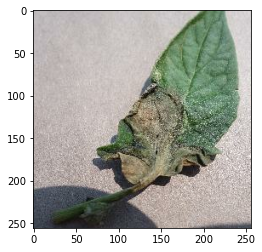

In [9]:
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

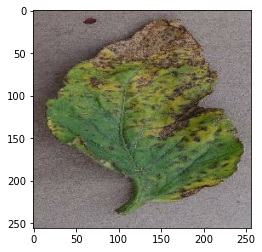

In [10]:
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    #plt.axis("off")

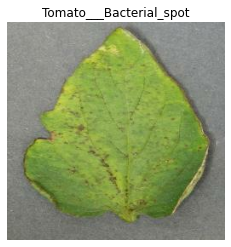

In [11]:
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

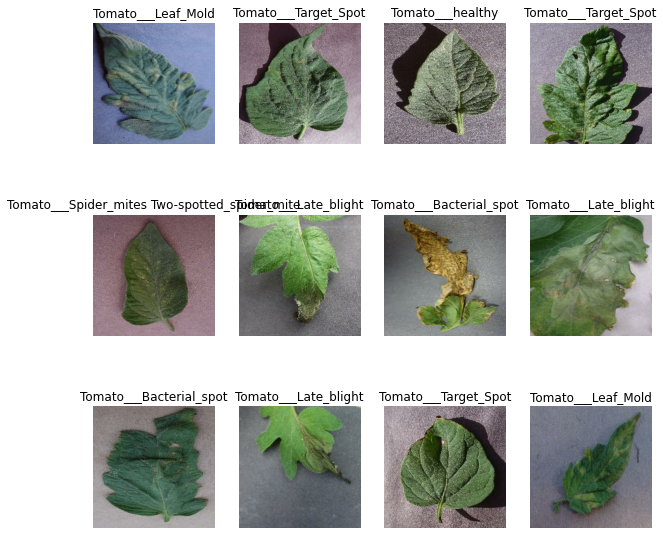

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#### Splitting the dataset in train, test and validation.

In [13]:
def get_dataset_partitions_tf(ds, train_split = 0.8,val_split = 0.1,test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(df)

In [15]:
len(val_ds)

31

In [16]:
len(test_ds)

32

In [17]:
len(train_ds)

250

#### Modelling

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape = (batch_size,image_size,image_size, channels)
n_classes = 10
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation = "relu",input_shape = (32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
])
model.build(input_shape = (32,256,256,3))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [24]:
steps_per_epoch = int(len(train_ds)/batch_size)
8000/32

250.0

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=8,
    restore_best_weights=False,
)

In [26]:
#storing our results in history to later plot our loss
epochs = 45
history = model.fit(
    train_ds,
    epochs = epochs,
    #steps_per_epoch = steps_per_epoch,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds,
    #callbacks = [early_stopping]
)


Epoch 1/45
250/250 [==============================] - 1973s 7s/step - loss: 1.7205 - accuracy: 0.3640 - val_loss: 1.2110 - val_accuracy: 0.5595
Epoch 2/45
250/250 [==============================] - 1444s 6s/step - loss: 1.0168 - accuracy: 0.6324 - val_loss: 1.4877 - val_accuracy: 0.5343
Epoch 3/45
250/250 [==============================] - 1710s 7s/step - loss: 0.8089 - accuracy: 0.7161 - val_loss: 1.2491 - val_accuracy: 0.6159
Epoch 4/45
250/250 [==============================] - 1816s 7s/step - loss: 0.6547 - accuracy: 0.7669 - val_loss: 1.2561 - val_accuracy: 0.6310
Epoch 5/45
250/250 [==============================] - 2157s 9s/step - loss: 0.5628 - accuracy: 0.8007 - val_loss: 0.9227 - val_accuracy: 0.7097
Epoch 6/45
250/250 [==============================] - 2301s 9s/step - loss: 0.4996 - accuracy: 0.8219 - val_loss: 1.0242 - val_accuracy: 0.7006
Epoch 7/45
250/250 [==============================] - 2515s 10s/step - loss: 0.4387 - accuracy: 0.8456 - val_loss: 0.5369 - val_accuracy

##### Testing the model on unseen data

In [27]:
model.evaluate(test_ds)

32/32 [==============================] - 403s 1s/step - loss: 0.2646 - accuracy: 0.9238


[0.26461663842201233, 0.923828125]

In [28]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and validation accuracy')

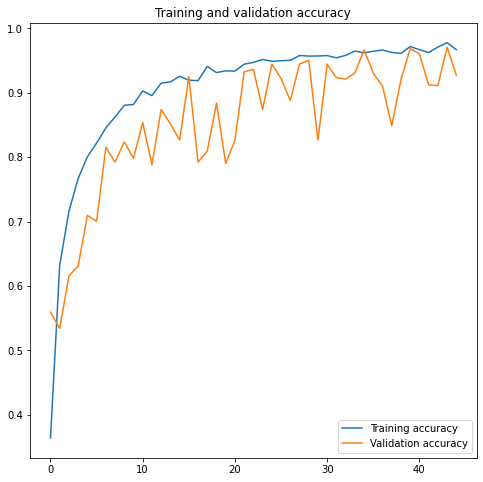

In [29]:
epochs = epochs
plt.figure(figsize=(8,8))
#plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = "Training accuracy")
plt.plot(range(epochs), val_acc, label = "Validation accuracy")
plt.legend(loc ="lower right")
plt.title("Training and validation accuracy")

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

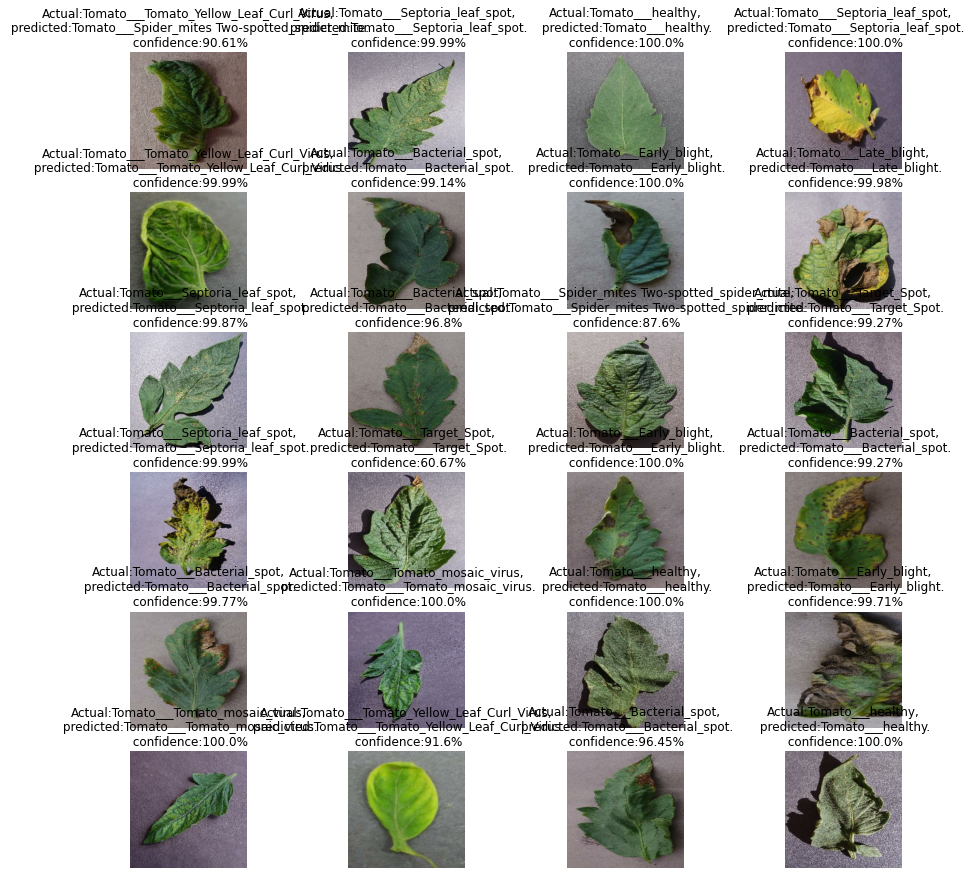

In [31]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(24):
        ax = plt.subplot(6,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class}.\n confidence:{confidence}%")
        
        plt.axis("off")

In [33]:
model.save(f"./models/2")

INFO:tensorflow:Assets written to: ./models/2\assets
